In [1]:
# ESSENTIALS
import numpy as np
import matplotlib.pyplot as plt

# DATA LIBRARIES
import pandas as pd

# CUSTOM IMPORTS
from Figure2_AuxiliaryCode import *

# PREFERENCES
pd.set_option('display.max_columns', 500)
plt.rcParams['figure.dpi'] = 400
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams.update({'font.size': 14})

Required data directories

In [2]:
base_dir = r"D:\AAA_Research\CUAHSI_SI_2022\dl\\"
data_dir = f"{base_dir}/data/"
camels_dir = base_dir

hrly_dir        = f"{data_dir}hourly_performances/"
HCDN_dir        = f"{data_dir}HCDN_nhru_final/"
linear_dir      = f"{data_dir}linear_timeseries/"
camelsatt_dir   = f"{data_dir}/camels_attributes_v2.0/camels_attributes_v2.0/"
lstmruns_dir    = f"{base_dir}full_runs/"
hrlyperf_dir    = f"{data_dir}hourly_performances/"
cfeval_dir      = f"{base_dir}val_runs/"
nwm_dir         = f"{base_dir}NWM_streamflow_results.csv"
stream_dir      = f"{base_dir}usgs_streamflow"

Weighting Fit

In [3]:
basins, nnse, outstruct = getWeightedFit(
    rfargs = {"n_estimators": 250}, 
    weightparams={
        "threshold":0.20,
        "n":1,
        "softmaxflag": False})

# NOTE THAT UNLESS A CONSTANT SEED IS USED, ENSEMBLING RESULTS FROM RFR WILL VARY SLIGHTLY FROM RUN TO RUN
camels_df, inputdataset, outputdataset, testvalues, test_modelno, test_modellist, featureimportance, metrics, trainlists = outstruct

D:\AAA_Research\CUAHSI_SI_2022\dl\\/data/hourly_performances/CFE.csv
D:\AAA_Research\CUAHSI_SI_2022\dl\\/data/hourly_performances/linear.csv
D:\AAA_Research\CUAHSI_SI_2022\dl\\/data/hourly_performances/LSTM.csv
D:\AAA_Research\CUAHSI_SI_2022\dl\\/data/hourly_performances/nwm.csv
Not weighting in 27 of 495 basins, partial weighting in 298
0 / 495
100 / 495


c:\Users\franc\OneDrive - University Of Houston\PastProjects\SI_ModelSelector\Repo\nextgen-form-eval\FrankTests\Figure2_AuxiliaryCode.py:497: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  q_read = pd.read_csv(f"{q_dir}/{basinid}-usgs-hourly.csv")


200 / 495
300 / 495
400 / 495


Hyperparameters for subsequent analysis

In [4]:
n_models = 4    # HOW MANY MODELS ARE BEING RUN
n_folds  = 5    # HOW MANY FOLDS IN CROSS VALIDATION FRAMEWORK

# -------------EXTREMELY IMPORTANT------------------------------------------- 
# DEFINE THE STARTING INDICES OF THESE LISTS AS THE SAME AS SHOWN IN THE CODE
# BLOCK ABOVE (ie, FIRST COLUMN = 0)
cfe_i       = 0
linear_i    = 1
lstm_i      = 2
nwm_i       = 3

# SLICING ARRAYS CORRESPONDING TO EACH MODEL
cfe_idx     = np.arange(cfe_i   , n_models*n_folds, n_models)
linear_idx  = np.arange(linear_i, n_models*n_folds, n_models)
lstm_idx    = np.arange(lstm_i  , n_models*n_folds, n_models)
nwm_idx     = np.arange(nwm_i   , n_models*n_folds, n_models)

Hard-code pretty labels for each variable included for model selection

In [5]:
real_labels = ["Soil Organic Fraction", 
               "Mean Elevation", 
               "Mean Slope", 
               "Basin Area", 
               "Soil Depth", 
               "Sand Fraction", 
               "Silt Fraction", 
               "Clay Fraction", 
               "Permeability", 
               "Precipitation Mean", 
               "Evapotranspiration Mean", 
               "Aridity", 
               "Snow Fraction", 
               "Freq. High Precip.", 
               "High Precip. Duration", 
               "Freq. Low Precip.", 
               "Low Precip. Duration"]

real_labels = np.array(real_labels)
print(*zip(featureimportance[0].index.values, real_labels))

('organic_frac', 'Soil Organic Fraction') ('elev_mean_x', 'Mean Elevation') ('slope_mean', 'Mean Slope') ('area_gages2', 'Basin Area') ('soil_depth_pelletier', 'Soil Depth') ('sand_frac', 'Sand Fraction') ('silt_frac', 'Silt Fraction') ('clay_frac', 'Clay Fraction') ('geol_permeability', 'Permeability') ('p_mean', 'Precipitation Mean') ('pet_mean', 'Evapotranspiration Mean') ('aridity', 'Aridity') ('frac_snow', 'Snow Fraction') ('high_prec_freq', 'Freq. High Precip.') ('high_prec_dur', 'High Precip. Duration') ('low_prec_freq', 'Freq. Low Precip.') ('low_prec_dur', 'Low Precip. Duration')


Get each metric from output structure

In [6]:
lstm_trainr2  = np.array(metrics[0])[lstm_idx]
lstm_testr2   = np.array(metrics[1])[lstm_idx]
lstm_trainmse = np.array(metrics[2])[lstm_idx]
lstm_testmse  = np.array(metrics[3])[lstm_idx]

cfe_trainr2  = np.array(metrics[0])[cfe_idx]
cfe_testr2   = np.array(metrics[1])[cfe_idx]
cfe_trainmse = np.array(metrics[2])[cfe_idx]
cfe_testmse  = np.array(metrics[3])[cfe_idx]

linear_trainr2  = np.array(metrics[0])[linear_idx]
linear_testr2   = np.array(metrics[1])[linear_idx]
linear_trainmse = np.array(metrics[2])[linear_idx]
linear_testmse  = np.array(metrics[3])[linear_idx]

nwm_trainr2  = np.array(metrics[0])[nwm_idx]
nwm_testr2   = np.array(metrics[1])[nwm_idx]
nwm_trainmse = np.array(metrics[2])[nwm_idx]
nwm_testmse  = np.array(metrics[3])[nwm_idx]

Export NNSE predictions from RFR

In [7]:
exportdataset = outputdataset
exportdataset["CFE_pred_nnse"] = testvalues[:, cfe_i]
exportdataset["linear_pred_nnse"] = testvalues[:, linear_i]
exportdataset["LSTM_pred_nnse"] = testvalues[:, lstm_i]
exportdataset["NWM_pred_nnse"] = testvalues[:, nwm_i]
exportdataset.insert(0, "basin_id", camels_df["hru_id"])
exportdataset.to_csv(f"{base_dir}nnse_pred.csv")

C:\Users\franc\AppData\Local\Temp\ipykernel_23892\647483131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportdataset["CFE_pred_nnse"] = testvalues[:, cfe_i]
C:\Users\franc\AppData\Local\Temp\ipykernel_23892\647483131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exportdataset["linear_pred_nnse"] = testvalues[:, linear_i]
C:\Users\franc\AppData\Local\Temp\ipykernel_23892\647483131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

(495, 4)
(495, 4)


Text(0, 0.5, 'NNSE')

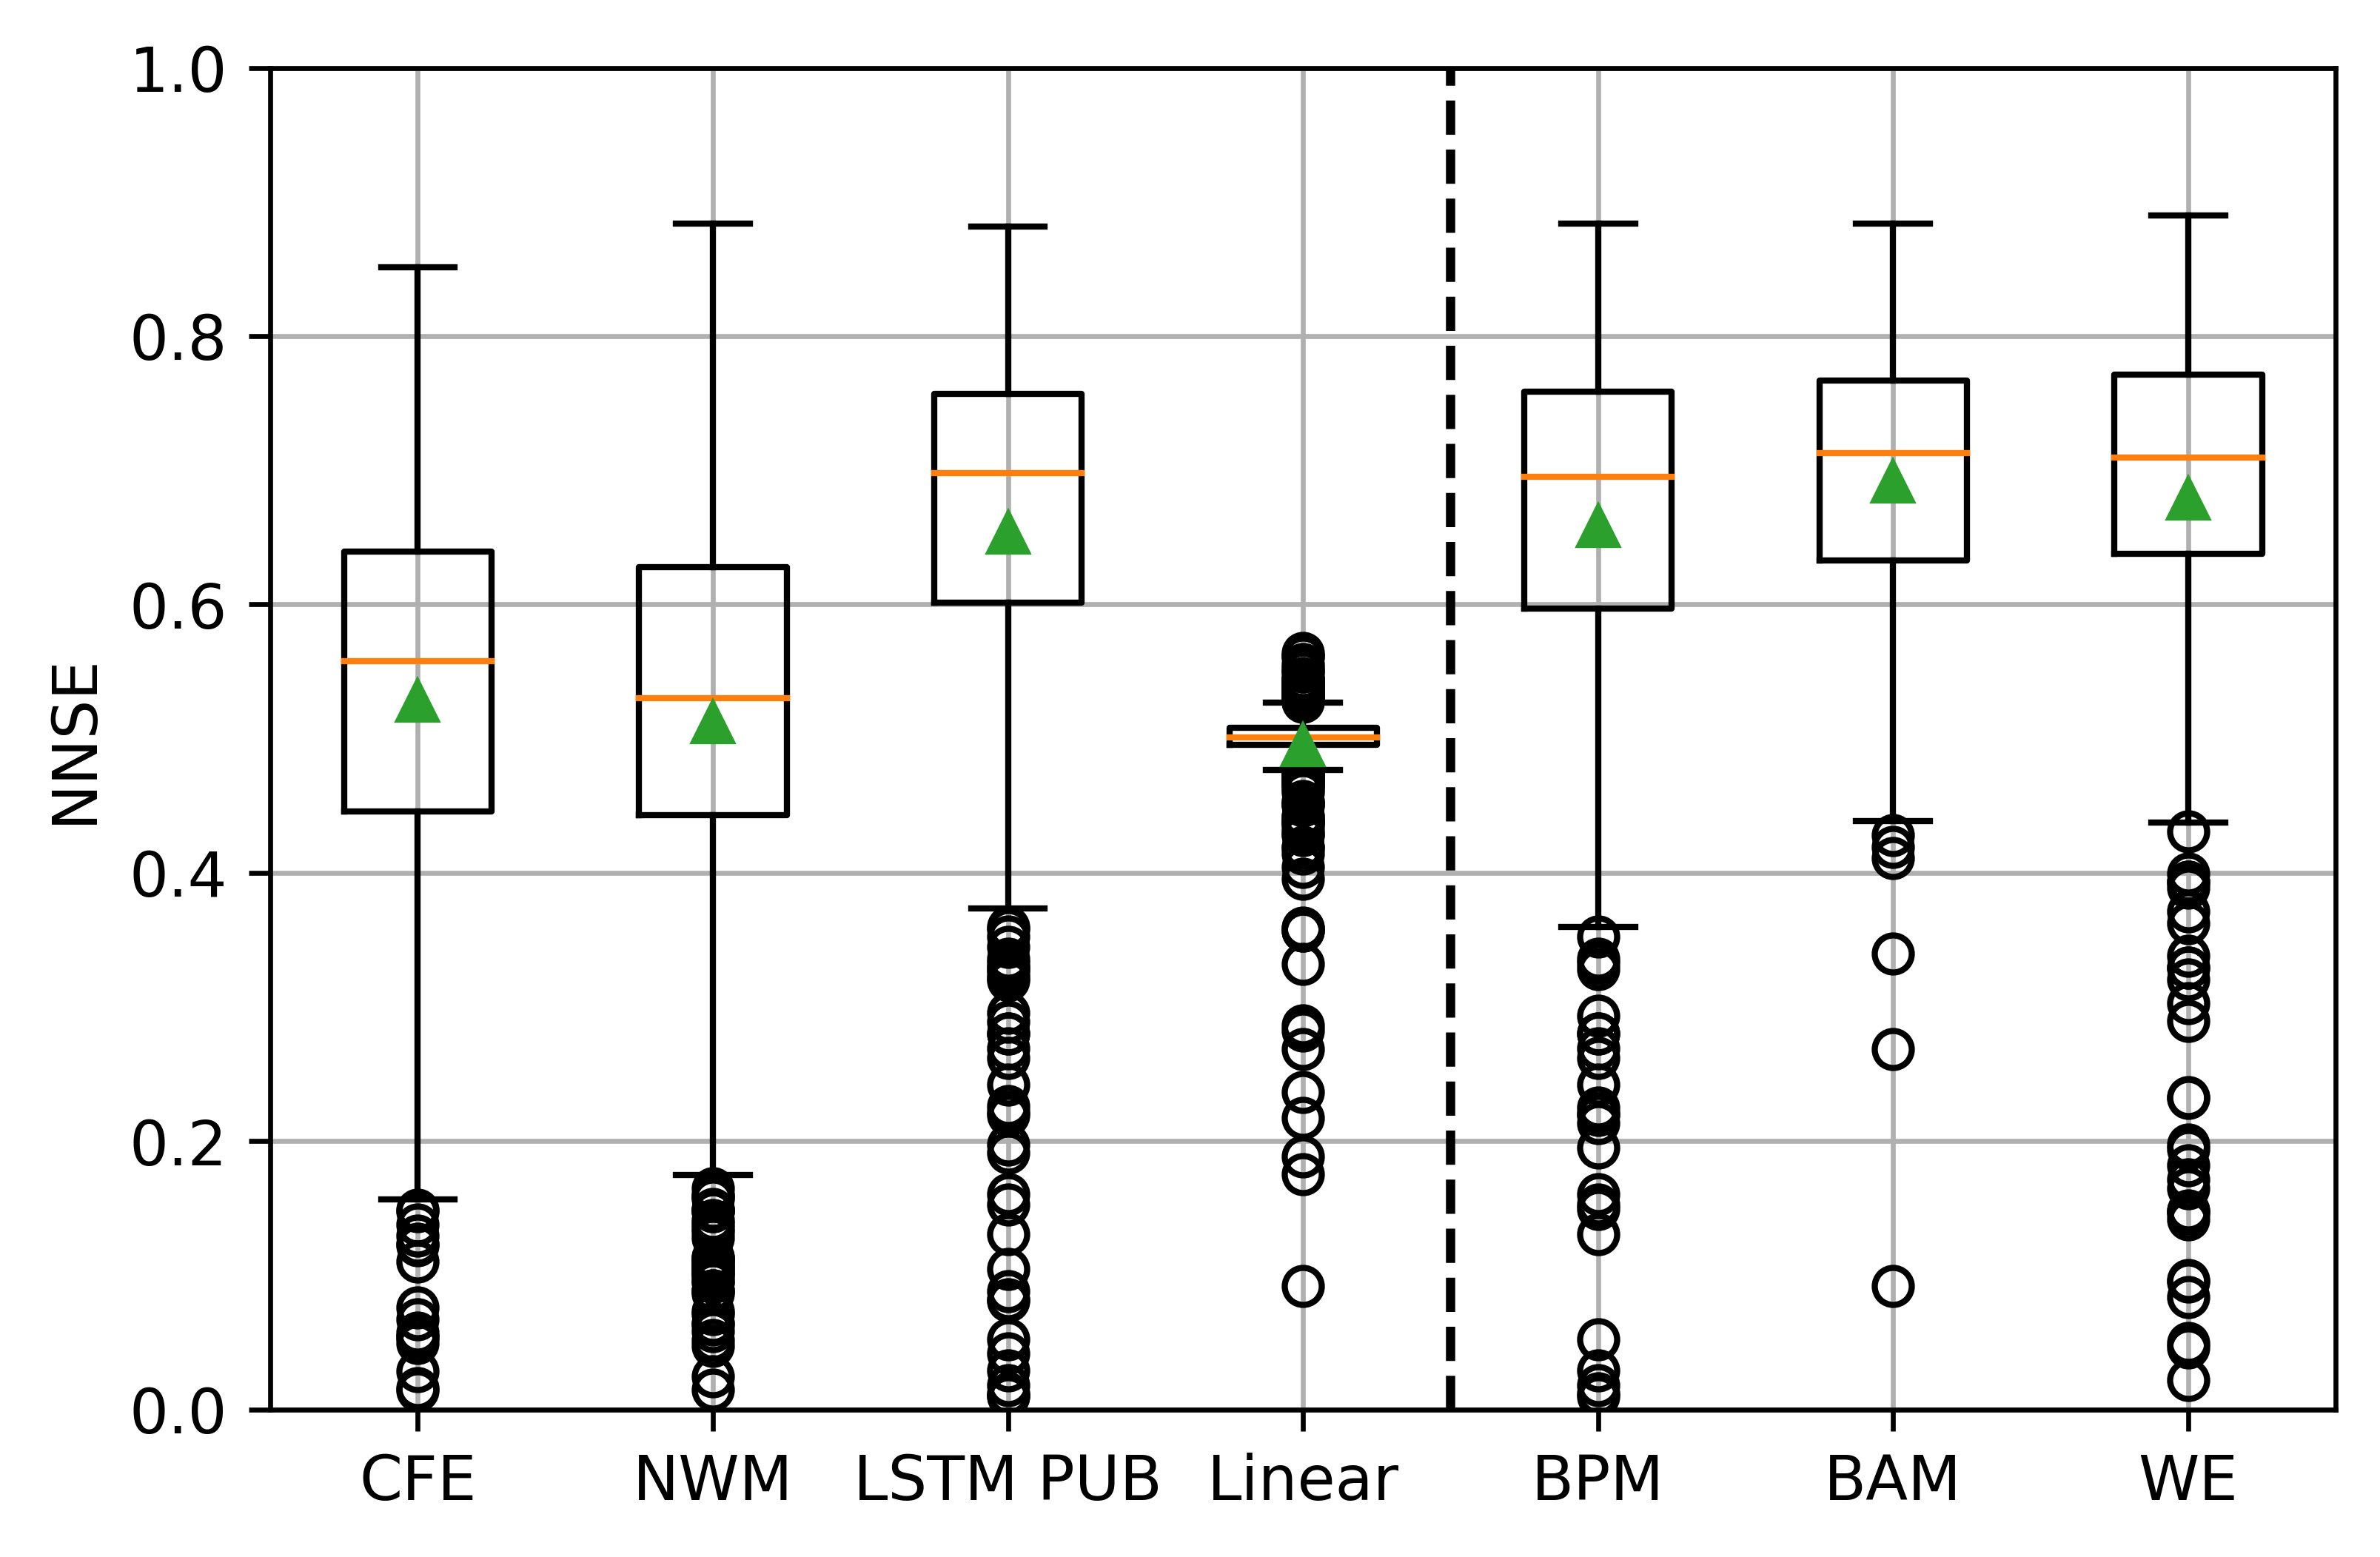

In [8]:
plt.rcParams['figure.figsize'] = (14, 7)
target = outputdataset[["CFE_nnse", "linear_nnse", "LSTM_nnse", "nwm_nnse"]]

# THIS IS THE BEST PREDICTED MODEL
# CALCULATED AS THE MAXIMUM OF THE PREDICTED PERFORMANCES
# BEST PRED MODEL = BPM
bpm_idx = np.argmax(testvalues, axis=1)
bpm_perf = testvalues[np.arange(testvalues.shape[0]), bpm_idx]

# THIS IS THE BEST ACTUAL MODEL
# CALCULATED AS THE MAXIMUM OF THE ACTUAL PERFORMANCES
# BEST ACTUAL MODEL = BAM
target_perf = target.to_numpy()
bam_idx = np.argmax(target_perf, axis=1)
bam_perf = target_perf[np.arange(testvalues.shape[0]), bam_idx]


# ACTUAL MODEL PERFORMANCE = AMP
amp = target.to_numpy()

# FOR EACH MODEL, GET BOTH THE REAL-WORLD PERFORMANCE AND ESTIMATES
print(amp.shape)
print(testvalues.shape)

cfe = amp[:, cfe_i]
cfe_est = testvalues[:, cfe_i]

linear = amp[:, linear_i]

nwm = amp[:, nwm_i]
nwm_est = testvalues[:, nwm_i]

lstm = amp[:, lstm_i]
lstm_est = testvalues[:, lstm_i]

bestpred_est = testvalues[np.arange(amp.shape[0]), bpm_idx]
bestpred_real = amp[np.arange(amp.shape[0]), bpm_idx]

bestmodel = bam_perf

perf_models = [cfe, nwm, lstm, linear, bestpred_real, bestmodel, nnse]
labs = ["CFE", "NWM", "LSTM PUB", "Linear", "BPM", "BAM", "WE"]

# CREATE PLOT
fig, ax = plt.subplots(facecolor="white", dpi=600)
ax.axvline(x=4.5, color="black", linestyle="--")
ax.boxplot(perf_models, labels=labs, showmeans=True)
ax.set_ylim(0,1)
ax.grid()
ax.set_ylabel("NNSE")

Create DataFrame comparing BAM, BPM, and Ensemble

In [9]:
perf_ensemble = pd.DataFrame(basins, columns=["basin_id"])
perf_ensemble["ensemble"] = nnse


bam_df = camels_df[["hru_id"]].copy()
bam_df['basin_id'] = bam_df['hru_id'].astype(str).str.zfill(8)
bam_df["bam"] = bam_perf
bam_df["bpm"] = bestpred_real

perf_df = bam_df.merge(perf_ensemble, on="basin_id")

Create and export performance DataFrame, which contains the real-world performance for each model in each basin.

In [10]:
mycamels = camels_df
mycamels['basin_id'] = mycamels['hru_id'].astype(str).str.zfill(8)

perfexport = mycamels[["basin_id","LSTM_nnse", "CFE_nnse", "nwm_nnse", "linear_nnse"]]
perfexport = perfexport.merge(perf_df, on="basin_id")

perfexport.to_csv(f"{base_dir}overallperf.csv")

Create Cumulative Density Plot

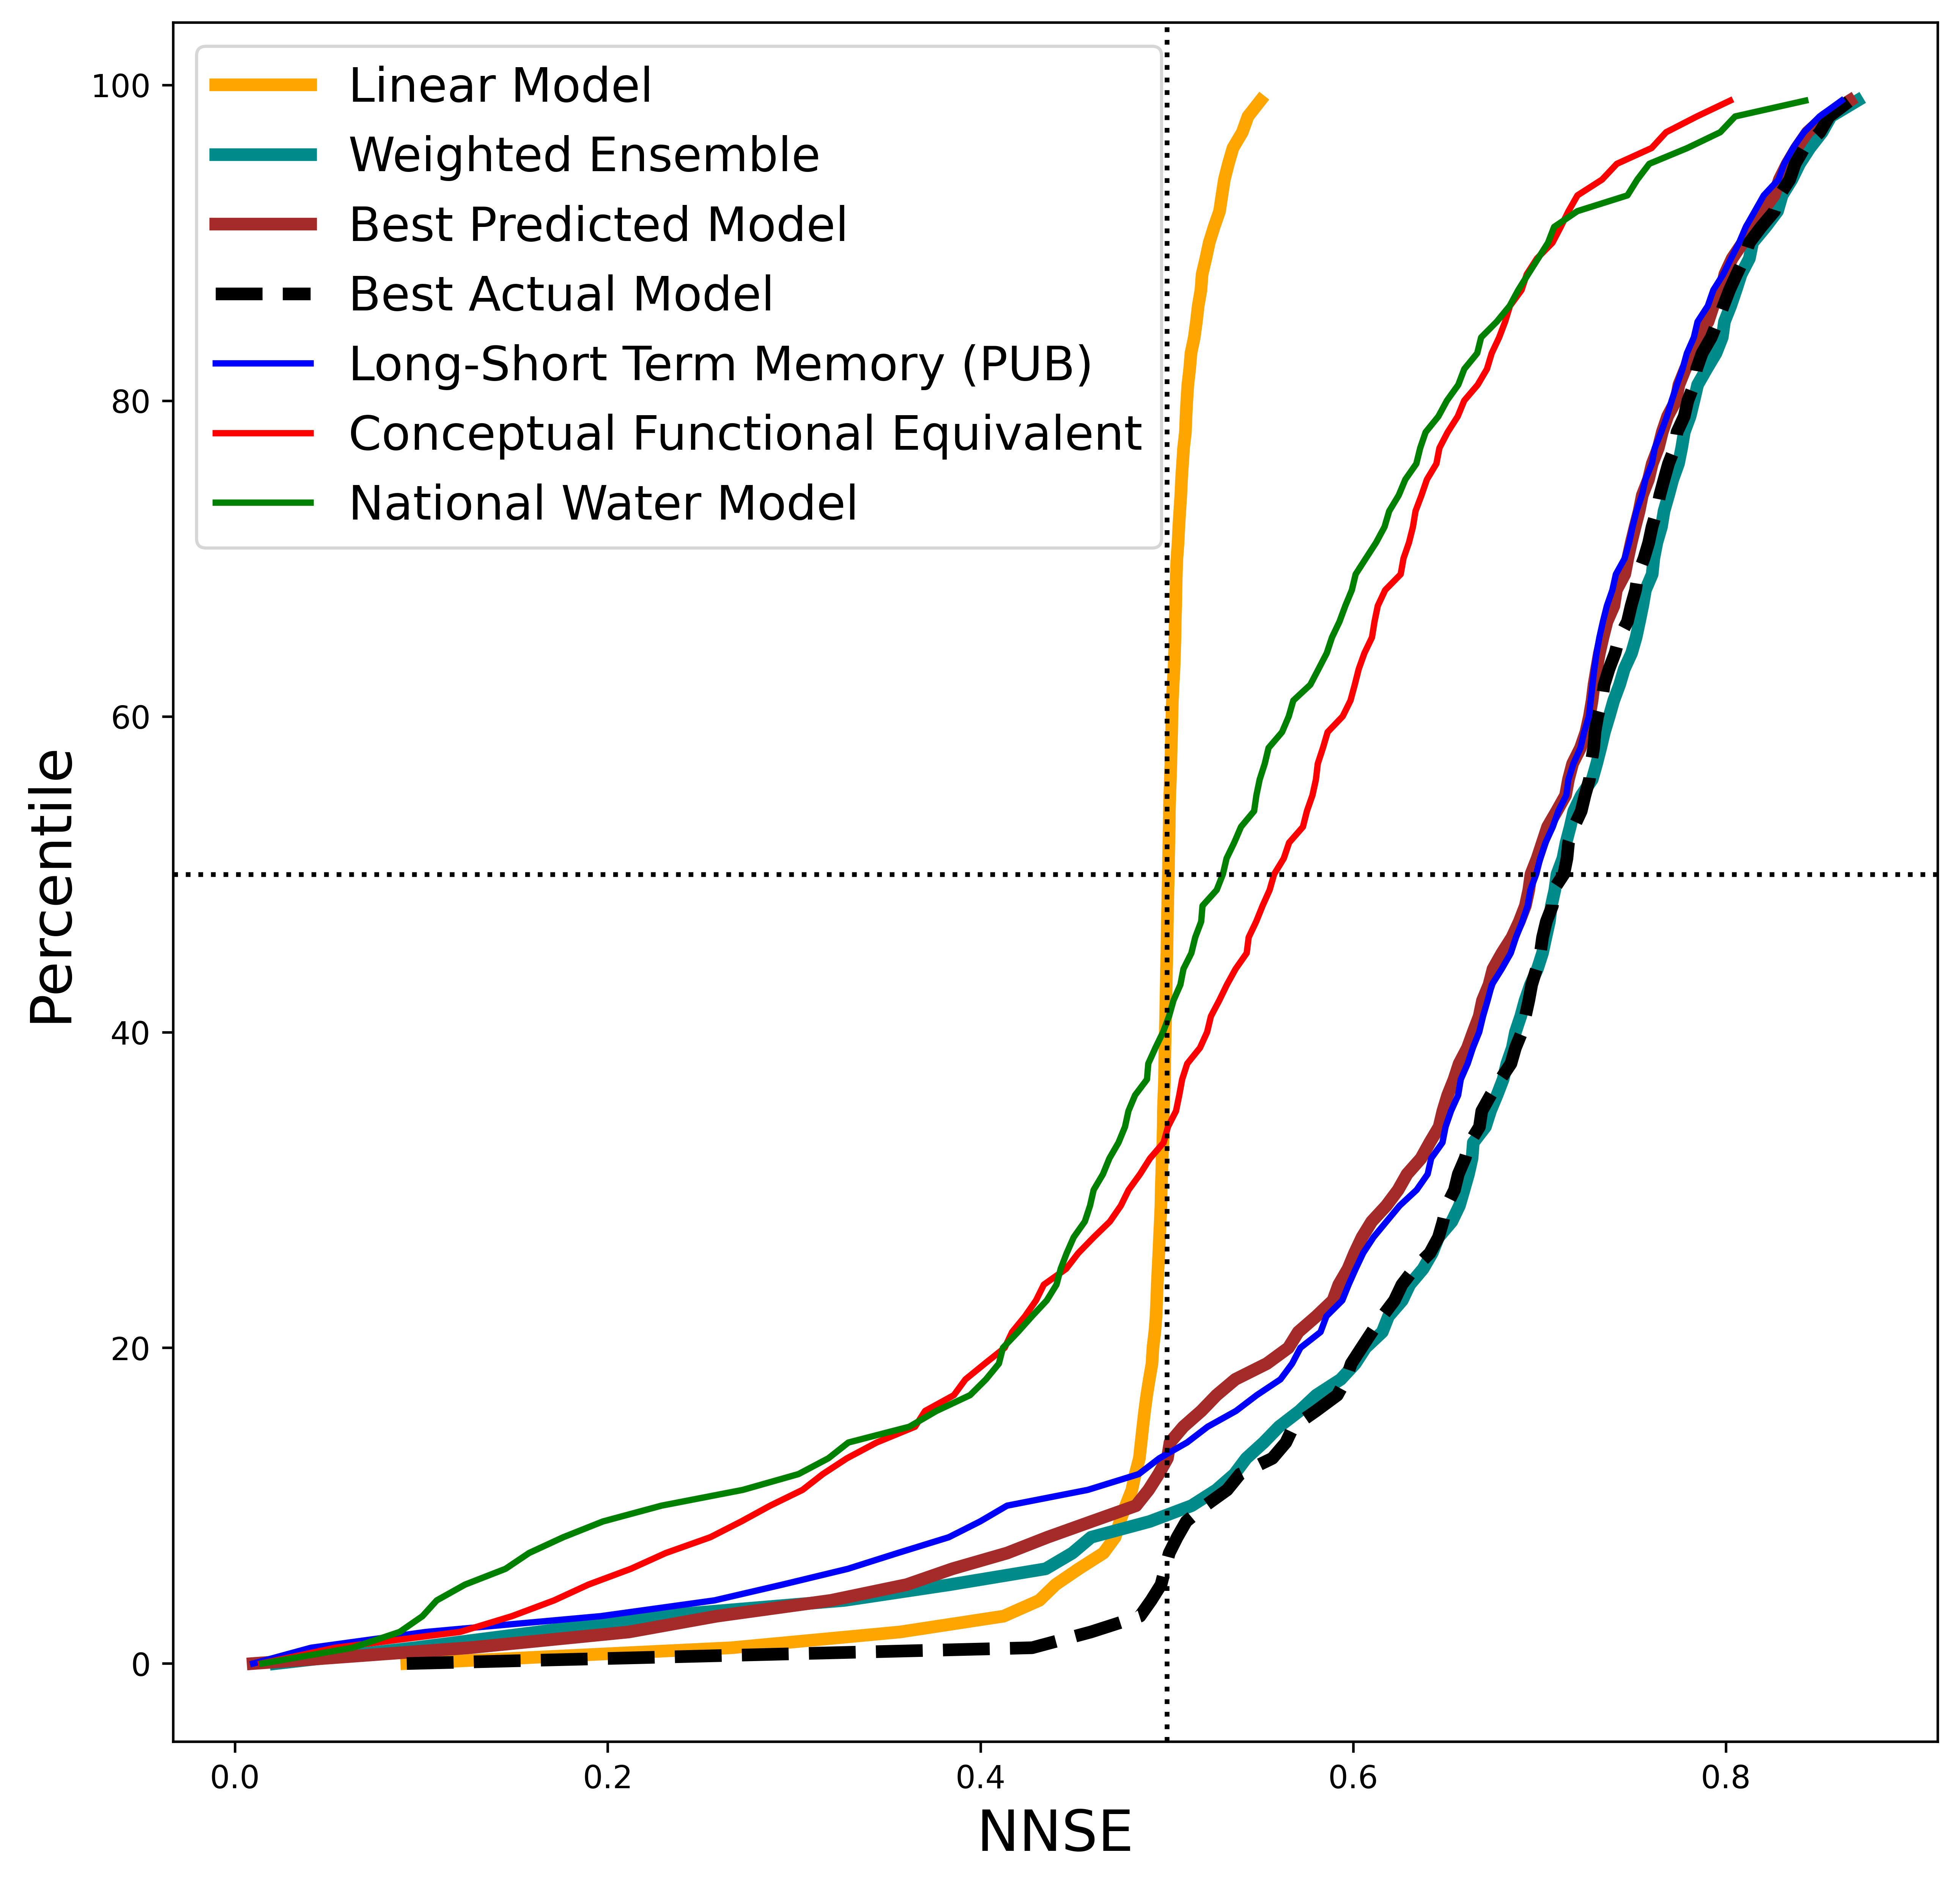

In [11]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 600

ensemblelist = list()
lstmlist = list()
cfelist = list()
nwmlist = list()
linearlist = list()
bpmlist = list()
bamlist = list()
quantiles = np.arange(0, 1, 0.01)
for i in quantiles:
    ensemblelist.append(perf_df.ensemble.quantile(i))
    bpmlist.append(perf_df.bpm.quantile(i))
    lstmlist.append(camels_df.LSTM_nnse.quantile(i))
    cfelist.append(camels_df.CFE_nnse.quantile(i))
    nwmlist.append(camels_df.nwm_nnse.quantile(i))
    bamlist.append(perf_df.bam.quantile(i))
    linearlist.append(camels_df.linear_nnse.quantile(i))
    
quantiles = quantiles*100

fig, ax = plt.subplots(facecolor="white")

ax.plot(linearlist, quantiles, "Orange", linewidth=4, label="Linear Model")
ax.plot(ensemblelist, quantiles, "darkcyan", linewidth=4, label="Weighted Ensemble")
ax.plot(bpmlist, quantiles, "brown", linewidth=4, label="Best Predicted Model")
ax.plot(bamlist, quantiles, "black", linewidth=4, linestyle="--", label="Best Actual Model")

ax.plot(lstmlist, quantiles, "Blue", linewidth=2, label="Long-Short Term Memory (PUB)")
ax.plot(cfelist, quantiles, "Red", linewidth=2, label="Conceptual Functional Equivalent")
ax.plot(nwmlist, quantiles, "Green", linewidth=2, label="National Water Model")

ax.set_xlabel("NNSE", fontsize=18)
ax.set_ylabel("Percentile", fontsize=18)

ax.axvline(x=0.5, color="black", linestyle=":")
ax.axhline(y=50, color="black", linestyle=":")

ax.legend(fontsize=15)